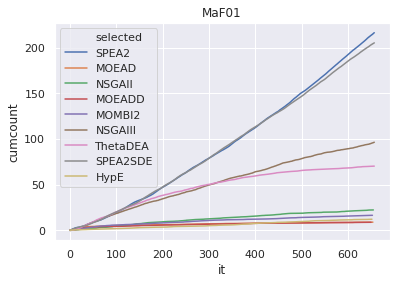

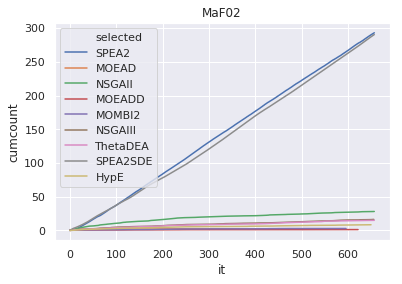

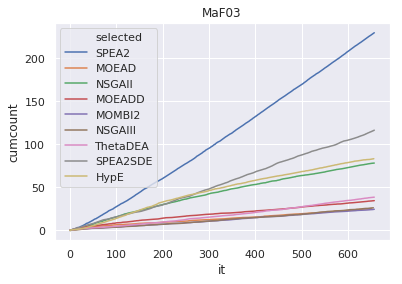

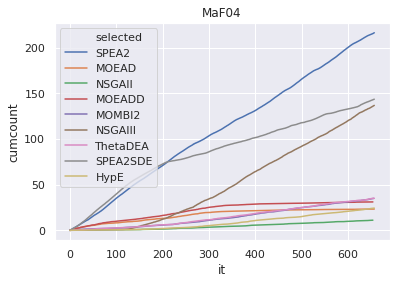

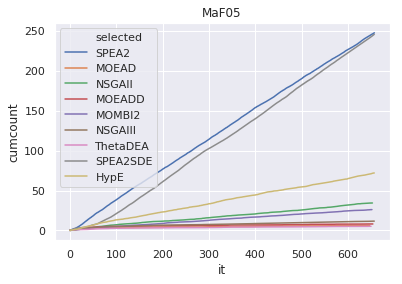

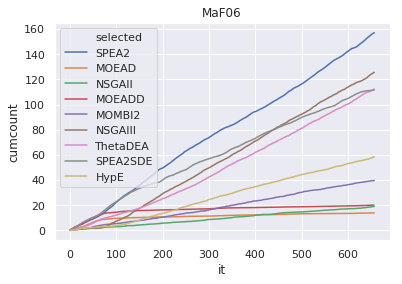

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

probs=["MaF01", "MaF02", "MaF03", "MaF04", "MaF05", "MaF06"]#, "MaF07", "MaF08", "MaF09", "MaF10"
        #, "MaF11", "MaF12", "MaF13"] #, "MaF14", "MaF15"]
pop_size = 210
runs = [str(i) for i in range(0, 20)]
algs=["SPEA2","MOEAD","NSGAII","MOEADD","MOMBI2","NSGAIII","ThetaDEA","SPEA2SDE","HypE"]
for prob in probs:
    path="../MaFMethodology/5/hhco/HHCOR2/%s/output/"%(prob)
    df_list=[]
    for run in runs:
        df = pd.read_csv(path+"selected."+run, names=["selected"])
        df['it'] = np.arange(len(df))
        df['run'] = run
        df_list.append(df)

    df = pd.concat(df_list)
    df = df.groupby(['selected', 'it']).size()
    df = df.to_frame(name = 'count').reset_index()
    df['count'] = df['count'] / 20
    df['cumcount'] = df.groupby(['selected'])['count'].cumsum()
    for i in range(0, len(algs)):
        df.loc[df['selected']==i, 'selected'] = algs[i]
    
    sns.lineplot(x="it", y="cumcount", hue="selected", data=df, dashes=False).set_title(prob)
    plt.show()